# Lesson 2 - makemore

character level language model - predict the next character

- Bigram - A bigram is is a lookup table that precits probability of chars
- Bag of Words -
- Multi Level Perceptrons - 2003
- Recurrent NN - 2011
- LSTM - 2014
- GRU - 2014
- Transformers - 2017 - GPT2 style


In [3]:
words = open('./data/names.txt', 'r').read().splitlines()
words[:5]


['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

What is the name "isabella" telling us?

1. i is likely to come first
2. s is likely to follow i
3. a is likely to follow s
4. a is likely to folllow is
5. b is likely to follow isa
6. b is likely to folllow sa
   ...
7. a is the final letter... after the rest of the words


In [7]:
# Bigram Language model
# we only look at 2 characters at a time
# simple & weak language model - good starting point




In [8]:
b = {}

for w in words:
  # add start and end tokens
  chs = ['<S>'] + list(w) + ['<E>']
  # for emma
  # w = 'Emma'
  # w[1:] = 'mma'
  # zip('Emma', 'mma') => [('e', 'm'), ('m', 'm'), ('m', 'a')]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

sorted(b.items(), key = lambda kv: -kv[1])
# bigram we'll count the occurances

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
# change our dict to be 2d array
# rows = 1st char
# cols = 2nd char
# how often does 2nd char follow first


In [31]:
import torch

In [51]:
# default is float32 (on this machine)
chars_total = 27 # alphabet 26 + start/end tokens 2
N = torch.zeros((chars_total, chars_total), dtype=torch.int32)


In [54]:
sorted_chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1 for i, ch in enumerate(sorted_chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [53]:
N.dtype
N[1,3] = 1
N[0,0] = 5

In [85]:
for w in words:
  # add start and end tokens
  chs = ['.'] + list(w) + ['.']
  # for emma
  # w = 'Emma'
  # w[1:] = 'mma'
  # zip('Emma', 'mma') => [('e', 'm'), ('m', 'm'), ('m', 'a')]
  for ch1, ch2 in zip(chs, chs[1:]):
    row = stoi[ch1]
    col = stoi[ch2]
    N[row, col] += 1

In [86]:
itos = {i: ch for ch, i in stoi.items()}

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 26.5, 26.5, -0.5)

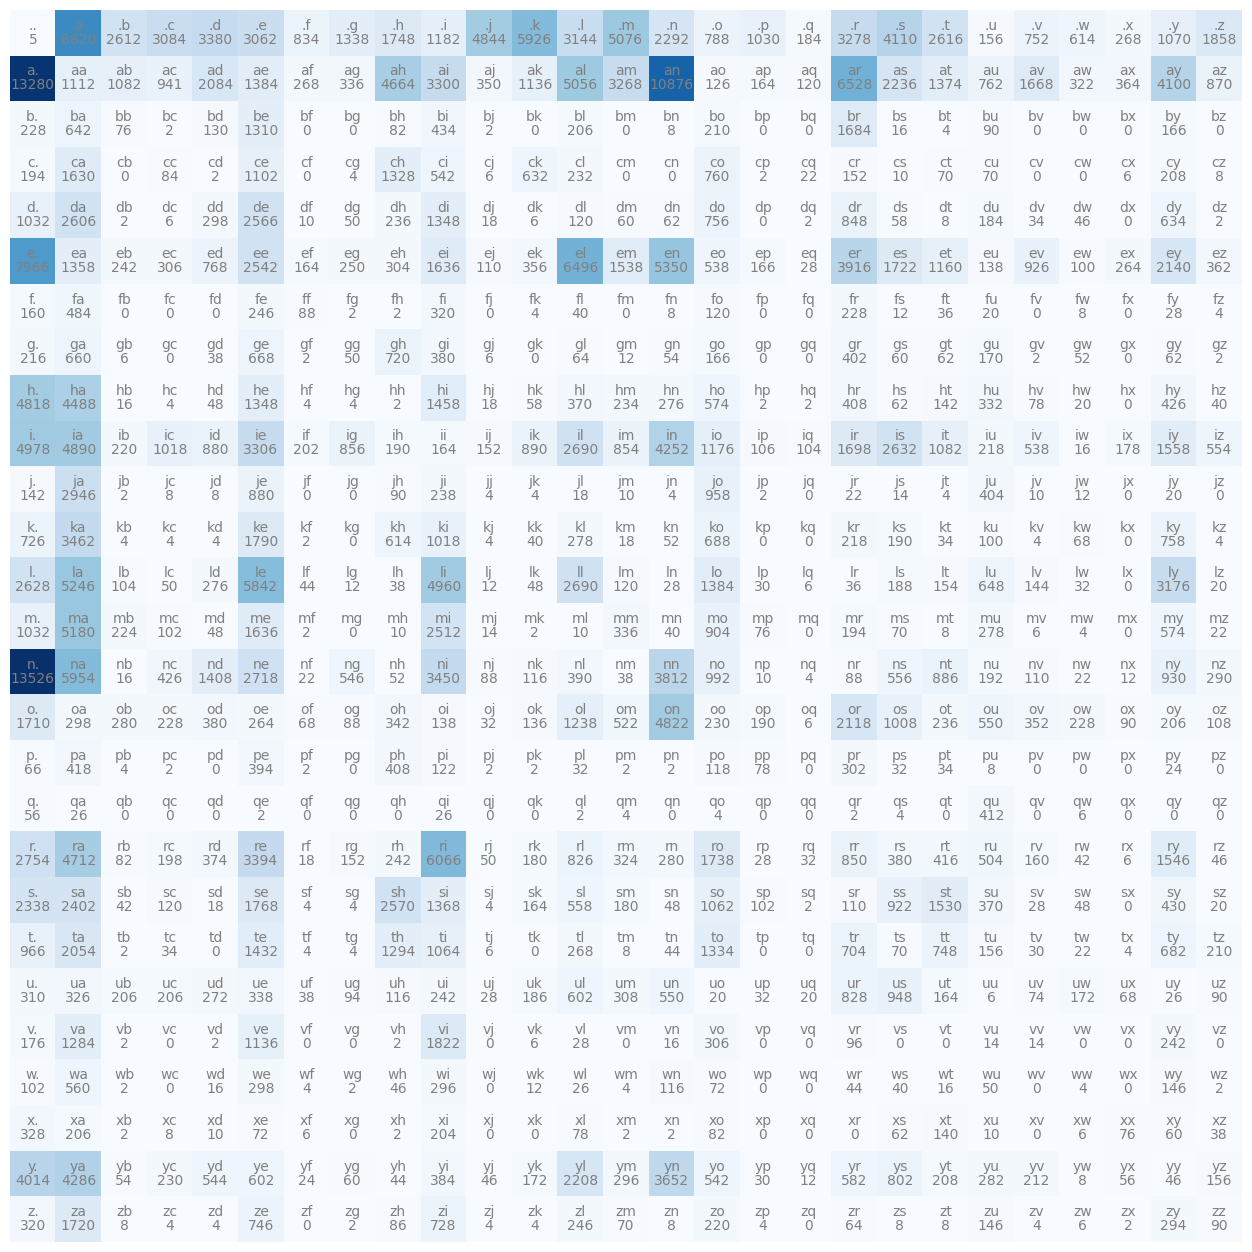

In [87]:
# plt.imshow(N)
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j] # bigrams "aa", "ab", "ac", ...
    plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
    # N[i,j] is a Tensor so we take the item() to get the integer value only
    plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')

plt.axis('off')
# notice the <S> and <E> tokens are invalidly used... S will never be the second char, E will never be the first char
# only possible can be <S> and <E> together = "" empty word

In [60]:
# N[0]
# N[0, :] # first row
#  N[:, 0] first column


tensor([   5, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [66]:
p = N[0].float()
p = p / p.sum()
print(p.sum())
p

tensor(1.)


tensor([0.0002, 0.1376, 0.0408, 0.0481, 0.0527, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0641, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [91]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

# now take that char to generate the next char


'.'

In [79]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
print(p) # approx 60% 0, 30% 1, 10% 2
# replacement = we can draw the same sample more than once; default it's False, once you draw it it's out of the bag.
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [98]:
p.shape

torch.Size([27])

In [100]:
g = torch.Generator().manual_seed(2147483647)

out = []

for i in range(10):
  ix = 0
  while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    # print(itos[ix])
    out.append(itos[ix])
    if ix == 0:
      break

print('trained: ', )
print(''.join(out))



g = torch.Generator().manual_seed(2147483647)

out2 = []
for i in range(10):
  ix = 0
  while True:
    # p = N[ix].float()
    # p = p / p.sum()
    p = torch.ones(27) / 27
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    # print(itos[ix])
    out2.append(itos[ix])
    if ix == 0:
      break

print('untrained: ', )
print(''.join(out2))

trained: 
junide.janasah.p.cony.a.nn.kohin.tolian.juee.ksahnaauranilevias.
untrained: 
juwjdvdipkcqaz.p.cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.rjpiufmthdt.rkrrsru.iyumuyfy.mjekujcbkhvupwyhvpvhvccragr.wdkhwfdztta.mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
